In [40]:
import numpy as np
import matplotlib.pyplot as plt

class Ising:

    def __init__(self, L, T):
        self.L = L
        self.T = T
        self.X = np.zeros((L,L,L,3))
        self.E = 0
        self.M = [0,0,0]
    
    def RandomNorm(self):
        x = []
        for i in range(3):
            x.append(2*np.random.random()-1)
        norm = np.linalg.norm(x)
        x[0]=x[0]/norm
        x[1]=x[1]/norm
        x[2]=x[2]/norm
        return x

    def SetGS(self):
        v = [1,0,0]
        for i in range(self.L):
            for j in range(self.L):
                for k in range(self.L):
                    self.X[i,j,k] = v
        self.M = [1,0,0]
    
    def nn(self,i,j,k): 
        result  = self.X[(i+1)%L, j, k] + self.X[(i-1)%L, j, k]
        result += self.X[i, (j+1)%L, k] + self.X[i, (j-1)%L, k]
        result += self.X[i, j, (k+1)%L] + self.X[i, j, (k-1)%L]
        return result
        
    def MetropolisHeis(self):
        i, j, k = np.random.randint(0, self.L, 3)
        V = self.RandomNorm()
        D = np.array(V - self.X[i,j,k])
        S = self.nn(i,j,k)
        dE = -(S[0]*D[0]+S[1]*D[1]+S[2]*D[2])
        dM = D*(1/pow(self.L,3))
        A = np.exp(-dE/self.T)
        r = np.random.rand()

        if r < A:
            self.X[ i, j, k] = V
            self.E += dE 
            self.M += dM

In [95]:
L = 10
T = np.linspace(1, 2, 10)
dim = pow(L,3)
Binder = []
Mag = []
Chi = []

for i in T:
    print('Working on the temperature :', i)
    M = np.array(())
    Lat = Ising(L,i)
    Lat.SetGS()
    for k in range(100*dim):
        Lat.MetropolisHeis()
    for k in range(300*dim):
        Lat.MetropolisHeis()
        if k%dim == 0:
            norm = np.linalg.norm(Lat.M)
            M = np.append(M,norm)
    m_avg = np.mean(M)
    m2_avg = np.mean(M*M)
    c = (m2_avg-pow(m_avg,2))*dim/i
    Mag.append(m_avg)
    Chi.append(c)

Working on the temperature : 1.0


KeyboardInterrupt: 

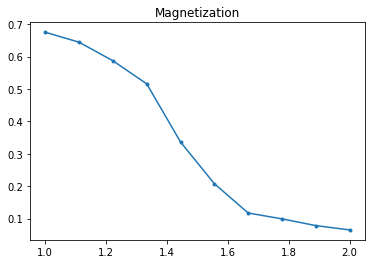

In [36]:
plt.plot(T, Mag, '.-')
plt.title("Magnetization")
plt.show()

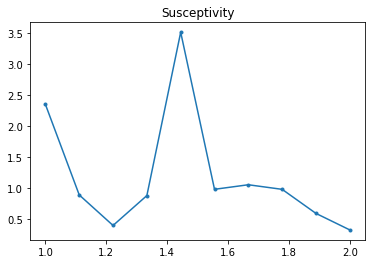

In [37]:
plt.plot(T, Chi, '.-')
plt.title("Susceptivity")
plt.show()

Working on the system of size : 6
[1. 0. 0.]
Working on the system of size : 8
[1. 0. 0.]
Working on the system of size : 10
[1. 0. 0.]
Working on the system of size : 12
[1. 0. 0.]
Working on the system of size : 14
[1. 0. 0.]
[-0.023548144687098132, -0.12919329227942183, -0.13164176706756256, -0.2062738040075166, -0.24155292398464528] [1.79175947 2.07944154 2.30258509 2.48490665 2.63905733]


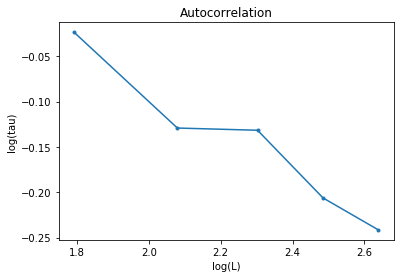

The value for z_c is:  -0.2572941458838595


In [94]:
import statistics

def autocorrelation(x):
    num = 0
    x_bar = statistics.mean(x)
    var = statistics.variance(x)
    length = len(x)-2 #maybe you need to change this
    i = 0
    while i < length:
        num += (x[i]*x_bar)*(x[i+1]-x_bar)
        i += 1
    num = num/length
    auto = num/var
    return auto
    
T = 1.443
L = 6
sizes = np.log(np.array([6,8,10,12,14]))
auto = []

while L <= 14:
    dim = pow(L,3)
    print('Working on the system of size :', L)
    M = np.array(())
    Lat = Ising(L,T)
    Lat.SetGS()
    for k in range(100*dim):
        Lat.MetropolisHeis()
    for k in range(3000*dim):
        Lat.MetropolisHeis()
        if k%(3*dim) == 0:
            norm = np.linalg.norm(Lat.M)
            M = np.append(M,norm)
    auto.append(autocorrelation(M))
    L += 2

log_tau = []

for l in range(len(auto)):
    log_tau.append(np.log(-1/(np.log(auto[l]))))

print(log_tau, sizes)

plt.plot(sizes, log_tau,'.-')
plt.title("Autocorrelation")
plt.ylabel("log(tau)")
plt.xlabel("log(L)")
plt.show()
z_c = (log_tau[len(sizes)-1]-log_tau[0])/(sizes[len(sizes)-1]-sizes[0])
print("The value for z_c is: ", z_c)